In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [ ]:
np.__version__

'1.19.5'

In [ ]:
def plot_result(history, ymin=None, ymax=None):
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)

    plt.plot(range(1,N_EPOCHS+1), history.history['loss'], label='train loss')
    plt.plot(range(1,N_EPOCHS+1), history.history['val_loss'], label='validation loss')
    plt.title('LOSS')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    if ymin!=None and ymax!=None:
        plt.ylim(ymin, ymax)
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(range(1, N_EPOCHS+1), history.history['accuracy'], label='train accuracy')
    plt.plot(range(1, N_EPOCHS+1), history.history['val_accuracy'], label='validation accuracy')
    plt.title('ACCURACY')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    if ymin!=None and ymax!=None:
        plt.ylim(ymin, ymax)
    plt.legend()

    plt.tight_layout()
    plt.show()

In [ ]:
# 하이퍼파라미터
LEARNING_RATE = 0.001
N_EPOCHS = 20
N_BATCHS = 100

In [ ]:
# Data loading 및 Dataset 생성
(train_image, train_label), (test_image, test_label) = keras.datasets.mnist.load_data()
train_image.shape, test_image.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
N_TRAIN = train_image.shape[0]
N_TEST = test_image.shape[0]
IMAGE_SIZE = 28
N_CLASS = 10

In [ ]:
X_train = train_image/255.
X_test = test_image/255.

y_train = keras.utils.to_categorical(train_label)
y_test = keras.utils.to_categorical(test_label)

In [ ]:
train_label[0]

5

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
# Dataset
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))\
                               .shuffle(N_TRAIN)\
                               .batch(N_BATCHS, drop_remainder=True)\
                               .repeat()
val_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(N_BATCHS)

In [ ]:
steps_per_epoch = N_TRAIN // N_BATCHS
validation_steps = int(np.ceil(N_TEST / N_BATCHS))

# 모델의 크기 변경

In [ ]:
# 작은 모델 => layer층, units수가 적은 것.
def create_model():
    model = keras.Sequential()
    model.add(keras.layers.Input((IMAGE_SIZE, IMAGE_SIZE)))
    model.add(keras.layers.Flatten())
#     Hidden
    model.add(keras.layers.Dense(8, activation='relu'))
#     Output
    model.add(keras.layers.Dense(N_CLASS, activation='softmax'))
    
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [ ]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 8)                 6280      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                90        
Total params: 6,370
Trainable params: 6,370
Non-trainable params: 0
_________________________________________________________________


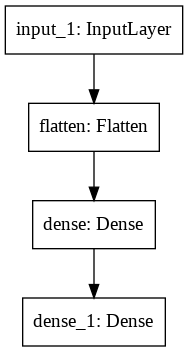

In [ ]:
from keras.utils import plot_model
plot_model(model)

In [ ]:
# keras.layers.ReLU(negative_slope=0.1)      -10*0.1, -10

In [ ]:
#학습
# N_EPOCHS=2
history=model.fit(train_dataset, 
                  epochs=N_EPOCHS,
                  steps_per_epoch=steps_per_epoch,
                  validation_data=val_dataset,
                  validation_steps=validation_steps)

Epoch 1/20
600/600 [==============================] - 2s 3ms/step - loss: 0.2974 - accuracy: 0.9167 - val_loss: 0.2921 - val_accuracy: 0.9157
Epoch 2/20
600/600 [==============================] - 2s 3ms/step - loss: 0.2889 - accuracy: 0.9186 - val_loss: 0.2900 - val_accuracy: 0.9170
Epoch 3/20
600/600 [==============================] - 2s 3ms/step - loss: 0.2824 - accuracy: 0.9213 - val_loss: 0.2855 - val_accuracy: 0.9161
Epoch 4/20
600/600 [==============================] - 2s 3ms/step - loss: 0.2782 - accuracy: 0.9214 - val_loss: 0.2799 - val_accuracy: 0.9195
Epoch 5/20
600/600 [==============================] - 2s 3ms/step - loss: 0.2737 - accuracy: 0.9233 - val_loss: 0.2883 - val_accuracy: 0.9192
Epoch 6/20
600/600 [==============================] - 2s 3ms/step - loss: 0.2707 - accuracy: 0.9237 - val_loss: 0.2818 - val_accuracy: 0.9206
Epoch 7/20
600/600 [==============================] - 2s 3ms/step - loss: 0.2678 - accuracy: 0.9247 - val_loss: 0.2775 - val_accuracy: 0.9208
Epoch 

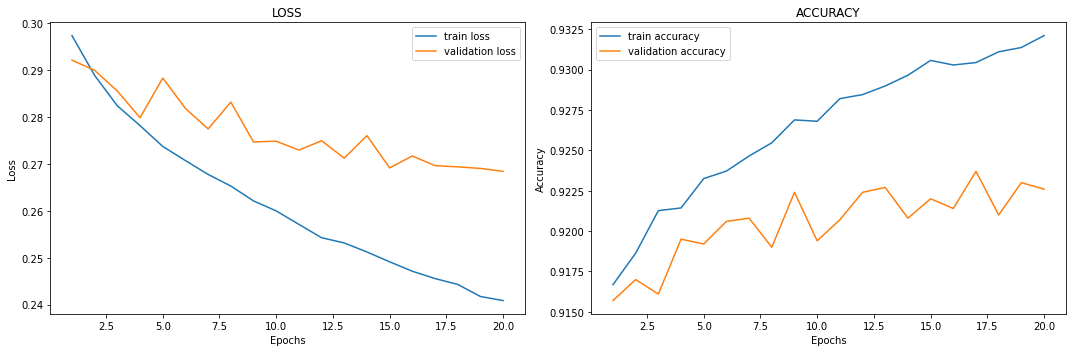

In [ ]:
plot_result(history)

In [ ]:
# 큰 모델  
# hidden layer : 4 - 256, 256, 128, 128
def create_model():
    model = keras.Sequential()
    model.add(keras.layers.Input((IMAGE_SIZE, IMAGE_SIZE)))
    model.add(keras.layers.Flatten())
#     Hidden
    model.add(keras.layers.Dense(256, activation='relu'))
    model.add(keras.layers.Dense(256, activation='relu'))
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dense(128, activation='relu'))
#     Output
    model.add(keras.layers.Dense(N_CLASS, activation='softmax'))
    
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [ ]:
model = create_model()

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 317,450
Trainable params: 317,450
Non-trainable params: 0
________________________________________________

In [ ]:
#학습
history=model.fit(train_dataset, 
                  epochs=N_EPOCHS,
                  steps_per_epoch=steps_per_epoch,
                  validation_data=val_dataset,
                  validation_steps=validation_steps)

Epoch 1/20
600/600 [==============================] - 3s 4ms/step - loss: 0.4661 - accuracy: 0.8602 - val_loss: 0.1213 - val_accuracy: 0.9632
Epoch 2/20
600/600 [==============================] - 3s 4ms/step - loss: 0.0964 - accuracy: 0.9706 - val_loss: 0.0915 - val_accuracy: 0.9707
Epoch 3/20
600/600 [==============================] - 3s 4ms/step - loss: 0.0645 - accuracy: 0.9801 - val_loss: 0.0824 - val_accuracy: 0.9757
Epoch 4/20
600/600 [==============================] - 3s 4ms/step - loss: 0.0467 - accuracy: 0.9853 - val_loss: 0.1065 - val_accuracy: 0.9690
Epoch 5/20
600/600 [==============================] - 3s 4ms/step - loss: 0.0352 - accuracy: 0.9884 - val_loss: 0.0798 - val_accuracy: 0.9757
Epoch 6/20
600/600 [==============================] - 3s 4ms/step - loss: 0.0307 - accuracy: 0.9901 - val_loss: 0.0658 - val_accuracy: 0.9820
Epoch 7/20
600/600 [==============================] - 3s 4ms/step - loss: 0.0210 - accuracy: 0.9933 - val_loss: 0.0815 - val_accuracy: 0.9787
Epoch 

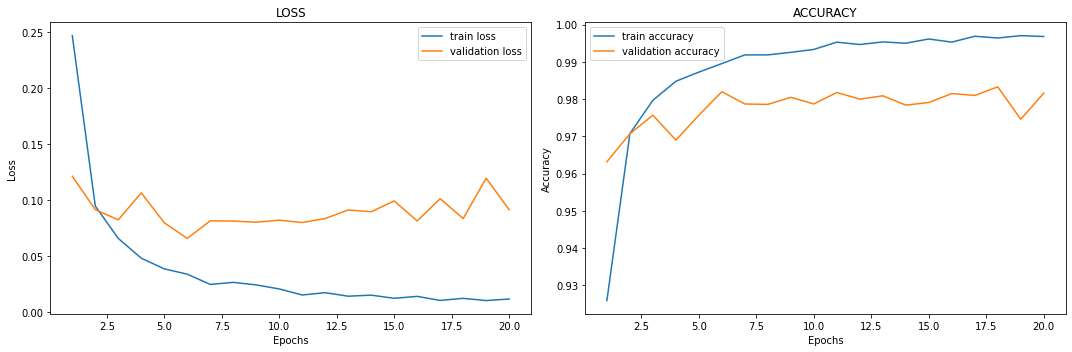

In [ ]:
plot_result(history)

# Dropout 적용

- dropout layer는 적용하려는 layer 앞에 추가한다.
- dropout 비율은 0 ~ 1 사이 실수로 지정하는데 보통 0.2 ~ 0.5 값을 지정한다.
- dropout이 적용된 모델을 학습시킬때는 epoch수를 더 늘려준다.

In [ ]:
DROPOUT_RATE = 0.5
def create_dropout_model():
    model = keras.Sequential()
    model.add(keras.layers.Input((IMAGE_SIZE, IMAGE_SIZE)))
    model.add(keras.layers.Flatten())
#     Hidden
    model.add(keras.layers.Dropout(rate=DROPOUT_RATE))
    model.add(keras.layers.Dense(256, activation='relu'))

    model.add(keras.layers.Dropout(rate=DROPOUT_RATE))
    model.add(keras.layers.Dense(256, activation='relu'))

    model.add(keras.layers.Dropout(rate=DROPOUT_RATE))
    model.add(keras.layers.Dense(128, activation='relu'))

    model.add(keras.layers.Dropout(rate=DROPOUT_RATE))
    model.add(keras.layers.Dense(128, activation='relu'))

#     Output
    model.add(keras.layers.Dropout(rate=DROPOUT_RATE))
    model.add(keras.layers.Dense(N_CLASS, activation='softmax'))
    
    # 컴파일
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [ ]:
model = create_dropout_model() #자동완성: control + space
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)              

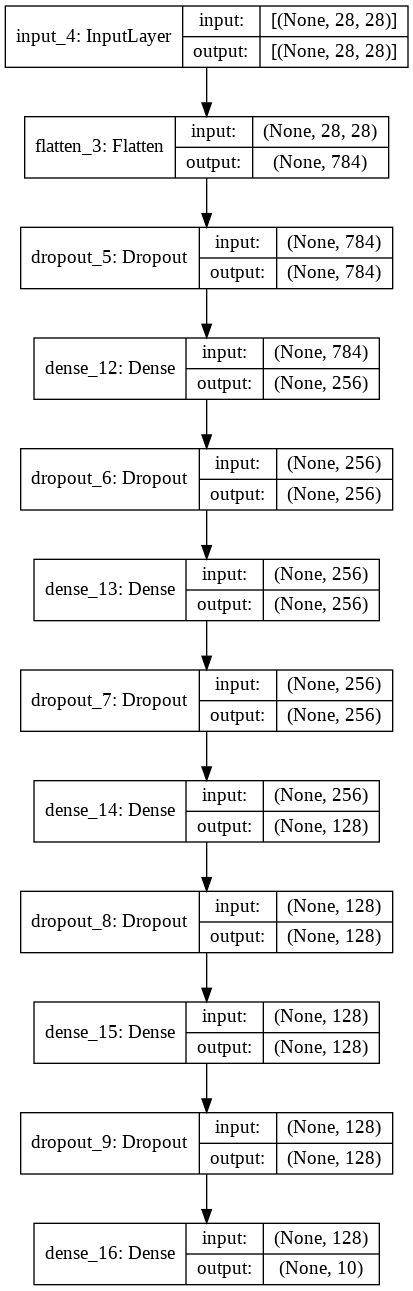

In [ ]:
plot_model(model, show_shapes=True)

In [ ]:
histroy = model.fit(train_dataset, 
                    epochs=N_EPOCHS,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=val_dataset,
                    validation_steps=validation_steps)

Epoch 1/20
600/600 [==============================] - 4s 5ms/step - loss: 1.7493 - accuracy: 0.3643 - val_loss: 0.3539 - val_accuracy: 0.9114
Epoch 2/20
600/600 [==============================] - 3s 4ms/step - loss: 0.6221 - accuracy: 0.8206 - val_loss: 0.2146 - val_accuracy: 0.9427
Epoch 3/20
600/600 [==============================] - 3s 4ms/step - loss: 0.4846 - accuracy: 0.8662 - val_loss: 0.1820 - val_accuracy: 0.9488
Epoch 4/20
600/600 [==============================] - 3s 4ms/step - loss: 0.4061 - accuracy: 0.8894 - val_loss: 0.1561 - val_accuracy: 0.9553
Epoch 5/20
600/600 [==============================] - 3s 4ms/step - loss: 0.3831 - accuracy: 0.8949 - val_loss: 0.1480 - val_accuracy: 0.9580
Epoch 6/20
600/600 [==============================] - 3s 4ms/step - loss: 0.3550 - accuracy: 0.9048 - val_loss: 0.1423 - val_accuracy: 0.9600
Epoch 7/20
600/600 [==============================] - 3s 4ms/step - loss: 0.3361 - accuracy: 0.9087 - val_loss: 0.1288 - val_accuracy: 0.9633
Epoch 

In [ ]:
plot_result(histroy)

NameError: ignored

In [ ]:
model.evaluate(val_dataset)

100/100 [==============================] - 0s 2ms/step - loss: 0.1030 - accuracy: 0.9698


[0.10304095596075058, 0.9697999954223633]

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
pred_dataset = X_test[:5]
pred_dataset.shape

(5, 28, 28)

In [ ]:
pred = model.predict(pred_dataset)
np.argmax(pred, axis=-1)

array([7, 2, 1, 0, 4])

In [ ]:
test_label[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

# Batch Normalization 

In [ ]:
def create_BN_model():
    model = keras.Sequential()
    model.add(keras.layers.Input((IMAGE_SIZE, IMAGE_SIZE)))
    model.add(keras.layers.Flatten())

    #Hidden
    model.add(keras.layers.Dense(256)) #Fully Connected Layer (Dense Layer)
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.ReLU())  #Activation Layer

    model.add(keras.layers.Dense(256))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.ReLU())

    model.add(keras.layers.Dense(128))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.ReLU())

    model.add(keras.layers.Dense(128))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.ReLU())

    #Output
    model.add(keras.layers.Dense(N_CLASS))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Softmax())  #keras.layers.Activation('sigmoid')

    # 컴파일
    model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [ ]:
model = create_BN_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
re_lu (ReLU)                 (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 256)               0

In [ ]:
history = model.fit(train_dataset, 
                    epochs=N_EPOCHS,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=val_dataset,
                    validation_steps=validation_steps)

Epoch 1/20
600/600 [==============================] - 7s 5ms/step - loss: 0.5904 - accuracy: 0.8851 - val_loss: 0.1924 - val_accuracy: 0.9684
Epoch 2/20
600/600 [==============================] - 3s 5ms/step - loss: 0.1805 - accuracy: 0.9715 - val_loss: 0.1202 - val_accuracy: 0.9764
Epoch 3/20
600/600 [==============================] - 3s 5ms/step - loss: 0.1097 - accuracy: 0.9806 - val_loss: 0.0920 - val_accuracy: 0.9779
Epoch 4/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0745 - accuracy: 0.9851 - val_loss: 0.0757 - val_accuracy: 0.9805
Epoch 5/20
600/600 [==============================] - 3s 4ms/step - loss: 0.0561 - accuracy: 0.9885 - val_loss: 0.0719 - val_accuracy: 0.9805
Epoch 6/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0465 - accuracy: 0.9895 - val_loss: 0.0730 - val_accuracy: 0.9803
Epoch 7/20
600/600 [==============================] - 3s 4ms/step - loss: 0.0382 - accuracy: 0.9905 - val_loss: 0.0648 - val_accuracy: 0.9822
Epoch 

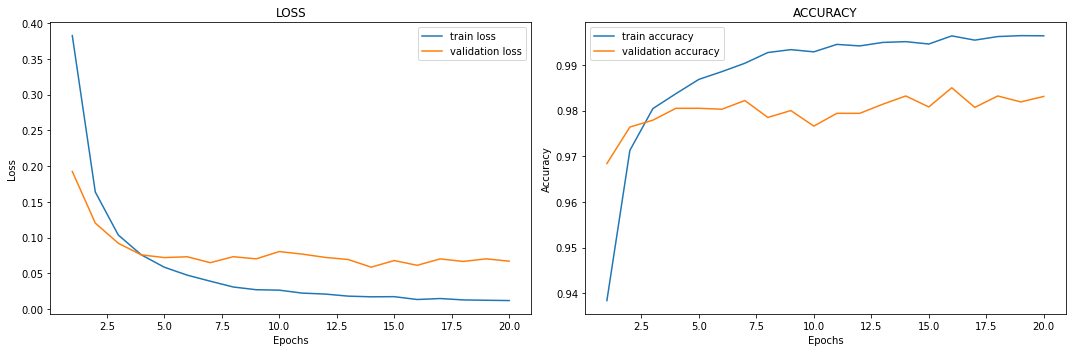

In [ ]:
plot_result(history)

# 학습률 조절

In [ ]:
LEARNING_RATE = 0.001
N_EPOCHS = 30

def create_model():
    model = keras.Sequential()
    model.add(keras.layers.Input((IMAGE_SIZE, IMAGE_SIZE)))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(256, activation='relu'))
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dense(N_CLASS, activation='softmax'))    

    return model

## ExponentialDecay 를 사용
- 일정한 step 마다 일정한 비율로 학습률을 변경(줄여준다.)


In [ ]:
lr_scheduler = keras.optimizers.schedules.ExponentialDecay(
                            initial_learning_rate=LEARNING_RATE,  #시작 학습률
                            decay_steps=steps_per_epoch * 10,  # 몇 step마다 학습률을 변경시킬 것인지. 10에폭
                            decay_rate=0.5, # 학습률의 변화율. 기존학습률 * 지정한 값
                            staircase=True  # True: 한번에 변경, False: 매스텝마다 조금씩 변화
) # optimizer의 학습률대신 lr_scheduler를 설정.

In [ ]:
model = create_model()

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr_scheduler), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_dataset, 
                    epochs=N_EPOCHS,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=val_dataset,
                    validation_steps=validation_steps)

Epoch 1/30
600/600 [==============================] - 3s 4ms/step - loss: 0.4766 - accuracy: 0.8656 - val_loss: 0.1143 - val_accuracy: 0.9653
Epoch 2/30
600/600 [==============================] - 2s 4ms/step - loss: 0.0994 - accuracy: 0.9693 - val_loss: 0.0872 - val_accuracy: 0.9732
Epoch 3/30
600/600 [==============================] - 3s 4ms/step - loss: 0.0641 - accuracy: 0.9799 - val_loss: 0.0711 - val_accuracy: 0.9766
Epoch 4/30
600/600 [==============================] - 2s 3ms/step - loss: 0.0446 - accuracy: 0.9863 - val_loss: 0.0666 - val_accuracy: 0.9779
Epoch 5/30
600/600 [==============================] - 2s 3ms/step - loss: 0.0313 - accuracy: 0.9895 - val_loss: 0.0804 - val_accuracy: 0.9777
Epoch 6/30
600/600 [==============================] - 2s 3ms/step - loss: 0.0298 - accuracy: 0.9901 - val_loss: 0.0790 - val_accuracy: 0.9762
Epoch 7/30
600/600 [==============================] - 2s 3ms/step - loss: 0.0262 - accuracy: 0.9916 - val_loss: 0.0721 - val_accuracy: 0.9809
Epoch 

# LearnRate 조정과 관련 callback 사용.
- Callback: 학습 도중 특정 이벤트(변화)가 발생하면 호출되는 기능.

## ReduceLROnPlateau callback
- patience 에폭 동안 monitor에 지정한 지표가 향상되지 않으면 현재 leaning_rate에 factor(0 ~ 1 실수)를 곱해서 learning rate를 조정한다.

In [ ]:
model = create_model()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# ReduceLROnPlateau callback 생성
rlp_callback = keras.callbacks.ReduceLROnPlateau(patience=10, # 10 에폭동안
                                                 monitor='val_loss', #validation loss의 지표가 향상되지 않으면
                                                 factor=0.5,  # 현재 학습률에 0.5 곱한것을 새 학습률로 조정해라.
                                                 verbose=1) #학습률이 바뀌면 로그를 출력

#  Callback은 fit할 때 적용
history = model.fit(train_dataset,
                    epochs=N_EPOCHS,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=val_dataset,
                    validation_steps=validation_steps,
                    callbacks=[rlp_callback])

Epoch 1/30
600/600 [==============================] - 3s 4ms/step - loss: 1.2660e-05 - accuracy: 1.0000 - val_loss: 0.0909 - val_accuracy: 0.9856
Epoch 2/30
600/600 [==============================] - 3s 4ms/step - loss: 9.1635e-06 - accuracy: 1.0000 - val_loss: 0.0929 - val_accuracy: 0.9855
Epoch 3/30
600/600 [==============================] - 3s 4ms/step - loss: 6.6623e-06 - accuracy: 1.0000 - val_loss: 0.0952 - val_accuracy: 0.9858
Epoch 4/30
600/600 [==============================] - 3s 4ms/step - loss: 4.8258e-06 - accuracy: 1.0000 - val_loss: 0.0977 - val_accuracy: 0.9858

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 5/30
600/600 [==============================] - 3s 4ms/step - loss: 3.6260e-06 - accuracy: 1.0000 - val_loss: 0.0988 - val_accuracy: 0.9859
Epoch 6/30
600/600 [==============================] - 3s 4ms/step - loss: 3.0402e-06 - accuracy: 1.0000 - val_loss: 0.1003 - val_accuracy: 0.9861
Epoch 7/30
600/600 [=======================

## LearningRateScheduler callback 사용
- 사용자 정의 학습률 조정함수를 만들어 적용.
- 학습률 조정하는 함수를 만들어서 callback생성시 등록
    - 매개변수
        1. epoch
        2. 현시점 learning rate
    - 반환값
        - 조정한 learning rate

In [ ]:
def user_lr(epoch, lr):
    if epoch < 5:
        return lr
    elif epoch <10:
        if epoch==6:
            print("================Change Learning Rate: ", lr*0.5, "Epochs: ", epoch)
        return lr*0.5
        
    elif epoch <20:
        if epoch==11:
            print("================Change Learning Rate: ", lr*0.5, "Epochs: ", epoch)
        return lr*0.5
    else:
        return lr

In [ ]:
lr_scheduler_callback = keras.callbacks.LearningRateScheduler(user_lr)

model = create_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_dataset, epochs=N_EPOCHS, 
                    steps_per_epoch=steps_per_epoch,
                    validation_data=val_dataset,
                    validation_steps=validation_steps,
                    callbacks=[lr_scheduler_callback])

Epoch 1/30
600/600 [==============================] - 3s 3ms/step - loss: 0.4747 - accuracy: 0.8650 - val_loss: 0.1158 - val_accuracy: 0.9645
Epoch 2/30
600/600 [==============================] - 2s 4ms/step - loss: 0.1012 - accuracy: 0.9698 - val_loss: 0.0981 - val_accuracy: 0.9678
Epoch 3/30
600/600 [==============================] - 2s 4ms/step - loss: 0.0603 - accuracy: 0.9808 - val_loss: 0.0852 - val_accuracy: 0.9722
Epoch 4/30
600/600 [==============================] - 2s 4ms/step - loss: 0.0487 - accuracy: 0.9841 - val_loss: 0.0755 - val_accuracy: 0.9764
Epoch 5/30
600/600 [==============================] - 2s 4ms/step - loss: 0.0348 - accuracy: 0.9890 - val_loss: 0.0701 - val_accuracy: 0.9780
Epoch 6/30
600/600 [==============================] - 2s 4ms/step - loss: 0.0171 - accuracy: 0.9949 - val_loss: 0.0560 - val_accuracy: 0.9832
Epoch 7/30
================Change Learning Rate:  0.0002500000118743628 Epochs:  6
600/600 [==============================] - 2s 4ms/step - loss: 0.